In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
  x_train.shape

(60000, 28, 28)

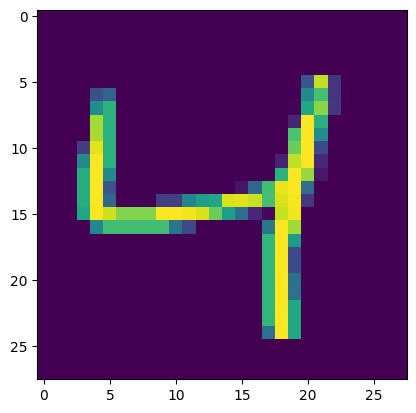

In [4]:
  import matplotlib.pyplot as plt
  plt.imshow(x_train[2])

In [5]:
x_train=x_train/255
x_test=x_test/255

In [6]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [9]:
history=model.fit(x_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8673 - loss: 0.4677 - val_accuracy: 0.9594 - val_loss: 0.1500
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9616 - loss: 0.1343 - val_accuracy: 0.9672 - val_loss: 0.1129
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9745 - loss: 0.0868 - val_accuracy: 0.9696 - val_loss: 0.1055
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0602 - val_accuracy: 0.9732 - val_loss: 0.0929
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9867 - loss: 0.0474 - val_accuracy: 0.9760 - val_loss: 0.0856
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0370 - val_accuracy: 0.9736 - val_loss: 0.0921
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9928 - loss: 0.0259 - val_accuracy: 0.9720 - val_loss: 0.0970
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9931 - loss: 0.0236 - 

In [10]:
  test=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [11]:
y_pred=test.argmax(axis=1)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9781

In [13]:
history.history

{'accuracy': [0.9188125133514404,
  0.9637500047683716,
  0.9741250276565552,
  0.981291651725769,
  0.9853125214576721,
  0.988895833492279,
  0.9912083148956299,
  0.9929166436195374,
  0.9948541522026062,
  0.9950000047683716,
  0.9955624938011169,
  0.9972083568572998,
  0.9966250061988831,
  0.9976875185966492,
  0.9977708458900452,
  0.9979791641235352,
  0.9987499713897705,
  0.9982083439826965,
  0.9995625019073486,
  0.997041642665863],
 'loss': [0.28238973021507263,
  0.12494073808193207,
  0.08569133281707764,
  0.06272643804550171,
  0.0487937405705452,
  0.037296853959560394,
  0.029169123619794846,
  0.02322123944759369,
  0.018241167068481445,
  0.01615365967154503,
  0.014420568011701107,
  0.00984423328191042,
  0.01088760420680046,
  0.00810167845338583,
  0.00787502434104681,
  0.006830645725131035,
  0.005159345921128988,
  0.0055845207534730434,
  0.0021182759664952755,
  0.009639370255172253],
 'val_accuracy': [0.9594166874885559,
  0.9672499895095825,
  0.9695833

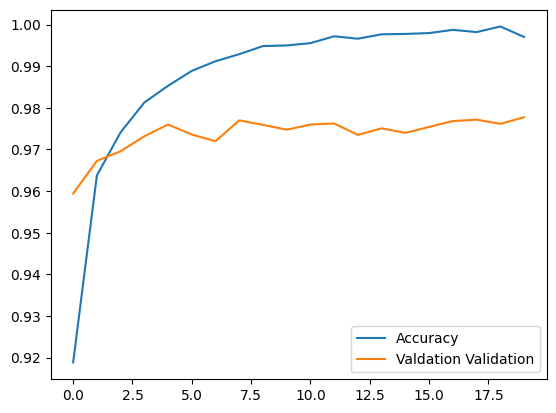

In [18]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Valdation Validation')
plt.legend()
plt.show()

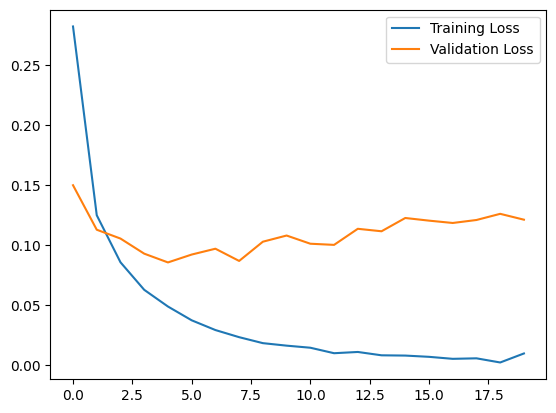

In [19]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

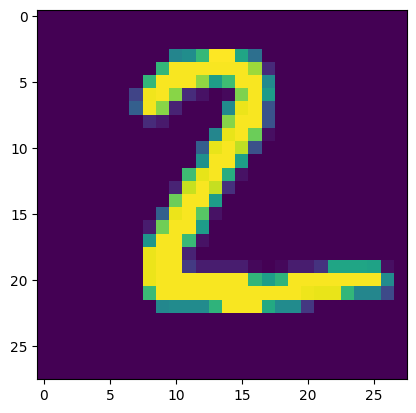

In [20]:
plt.imshow(x_test[1])

In [21]:
no=model.predict(x_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [22]:
   print(f"The image is of no:{no[0]}")

The image is of no:2
